# 혼공머 03-3
> 특성 공학과 규제 , 릿지와 라쏘

- toc:true
- branch: master
- badges: true
- comments: true
- author: 김동준
- categories : ["Python", "혼공머"]

# 주로쓰는 패키지들

In [21]:
import numpy as np #넘파이
import pandas as pd #판다스
from plotnine import *  #플롯나인
import matplotlib.pyplot as plt #맷플랏립
import plotly.express as px #플랏리 상호작용 그래프
from IPython.display import HTML #블로그에 html로 올리려고 변환하는 패키지
import seaborn as sns # 씨본, 히스토그램 깔끔하게 그리는 패키지
from sklearn.neighbors import KNeighborsClassifier # k 최근접이웃
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor  # 결정계수 
from sklearn.metrics import mean_absolute_error # 타깃과 예측의 절댓값 오차 평균을 반환
from sklearn.linear_model import LinearRegression # 선형 회귀
from sklearn.preprocessing import PolynomialFeatures #다중회귀로의 변환기
from sklearn.preprocessing import StandardScaler #규제
from sklearn.linear_model import Ridge #릿지
from sklearn.linear_model import Lasso #라쏘

# 다중회귀
> 여러 개의 특성을 사용한 선형 회귀

> 3차원 이상의 공간을 그리거나 상상할 수는 없음 $\to$ 특성공학 feature engineering 으로 기존의 특성을 사용해 새로운 특성을 뽑아내어 회귀

# 데이터 준비
> https://bit.ly/perch_csv_data : 홈페이지에서 바로 csv 데이터를 사용한다.

> https://bit.ly/perch_data : 타깃 데이터

## 판다스 pandas 이용

> 데이터프레임으로 다차원 배열 다루기

> csv데이터를 불러오고 데이터프레임으로 저장한 뒤 넘파이 배열로 다시 바꾼다.

In [3]:
#csv 불러오기(데이터 프레임으로)
df = pd.read_csv('https://bit.ly/perch_csv_data')

#넘파이 배열로 바꾸기
perch_full = df.to_numpy()

In [4]:
# 타깃데이터
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [5]:
# perch_full 과 perch_weight를 훈련 세트와 테스트 세트로 나누기
train_input , test_input , train_target, test_target = train_test_split(perch_full , perch_weight , random_state=42)

# 사이킷런의 변환기
> 새로운 특성을 만든다. PolynomialFeatures 클래스 이용

## 함수 다뤄보기

In [7]:
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


> 샘플 2,3 이 6개의 특성을 가진 샘플 1,2,3,4,5,9 로 바뀜

> 기존 2,3 에 각각을 제곱한 4,9 , 두 수를 곱한 6 , 선형 방정식의 절편에 곱해지는 1 (약속)

> 이때 1은 굳이 필요없으므로 제거 $\to$ include_bias = False

In [8]:
poly = PolynomialFeatures(include_bias = False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


## 실제 데이터에 적용

In [9]:
# 훈련 세트 변환
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape) # 배열의 크기

(42, 9)


In [11]:
# 각각의 배열이 어떻게 생성되었는지 확인하기
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [12]:
# 테스트 세트 변환
test_poly = poly.transform(test_input)

# 다중 회귀 모델 훈련하기

In [14]:
# 훈련 세트
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly ,train_target))

0.9903183436982125


In [15]:
# 테스트 세트
print(lr.score(test_poly , test_target))

0.9714559911594155


## 특성을 더 추가해보기

> 3제곱 4제곱항 등 더 추가 (degree로)

In [16]:
poly = PolynomialFeatures(degree = 5 , include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [17]:
# 훈련 세트
lr.fit(train_poly , train_target)
print(lr.score(train_poly, train_target))

0.9999999999938143


In [18]:
# 테스트 세트
print(lr.score(test_poly , test_target))

-144.40744533753661


> 훈련세트에 너무 과대적합 되어서 테스트 세트에서는 형편없는 점수

# 규제
> 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하게 막아준다. (과대적합 막기)

> 선형회귀모델에 규제를 추가한 모델 : ridge , lasso

> ridge : 계수를 제곱한 값을 기준으로 규제 적용 , lasso : 계수의 절댓값을 기준으로 규제 적용

In [20]:
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

# 릿지 회귀

> 규제의 양을 임의로 조절 가능 (alpha조절 $\to$ 사람이 알려줘야하는 파라미터 : 하이퍼파라미터)

>> alpha 값이 크면 규제 강도가 세지므로 계수 값을 더 줄여 조금 더 과소적합되지 않도록 유도

>> alpha 값이 작으면 선형회귀 모형과 비슷해져 과대적합이 될 가능성이 커짐

In [22]:
ridge = Ridge()
ridge.fit(train_scaled , train_target)
print(ridge.score(train_scaled , train_target))

0.9896101671037343


In [23]:
print(ridge.score(test_scaled , test_target))

0.979069397761539


> 테스트 세트 점수가 정상으로 돌아옴, 너무 과대적합되지 않아 테스트 세트에서도 좋은 성능

## 적절한 alpha 값 찾기

> alpha 값에 대한 $R^2$ 값의 그래프를 그려보기

In [24]:
# alpha 값을 바꿀 때마다 score() 메서드의 결과를 저장할 리스트
train_score = []
test_score = []

In [25]:
# alpha 값을 0.001에서 100까지 10배씩 늘려가며 릿지 회귀 모델 훈련 후 점수를 파이썬 리스트에 저장
alpha_list = [0.001 , 0.01 , 0.1 , 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha) #릿지모델생성
    ridge.fit(train_scaled, train_target) #릿지모델훈련
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

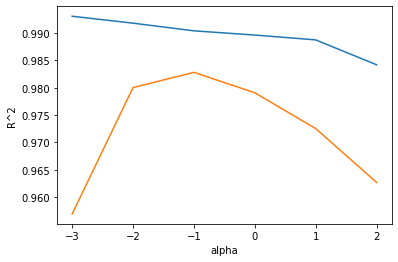

In [26]:
#동일한 간격으로 데이터를 나타내기 위해 로그함수로 바꾸어 지수로 표현
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

> 파란색 : 훈련 세트 , 주황색 : 테스트 세트

> 두 그래프가 가장 가깝고 테스트 세트의 점수가 가장 높은 -1 일때 , 즉 $10^{-1}=0.1$ 이 최적의 alpha값 ! 

In [27]:
# alpha = 0.1 로 다시 릿지
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled , train_target)
print(ridge.score(train_scaled , train_target))
print(ridge.score(test_scaled , test_target))

0.9903815817570368
0.9827976465386954


> 훌륭한 결과

# 라쏘 회귀

In [28]:
lasso = Lasso()
lasso.fit(train_scaled , train_target)
print(lasso.score(train_scaled , train_target))
print(lasso.score(test_scaled , test_target))

0.989789897208096
0.9800593698421886


In [29]:
# 최족의 라쏘 alpha 찾기
train_score = []
test_score = []

alpha_list = [0.001, 0.01 , 0.1 ,1 ,10 ,100]

for alpha in alpha_list:
    lasso = Lasso(alpha=alpha , max_iter=10000) #릿지모델생성
    lasso.fit(train_scaled, train_target) #릿지모델훈련
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/home/cjfal/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957794062, tolerance: 518.2793833333334
/home/cjfal/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345401813, tolerance: 518.2793833333334


> 오류메시지!? : 사이킷런의 라쏘 모델은 최적의 계수를 찾기 위해 반복적인 계산을 수행하는데, 지정한 반복 횟수가 부족할 때 이런 경고가 발생.

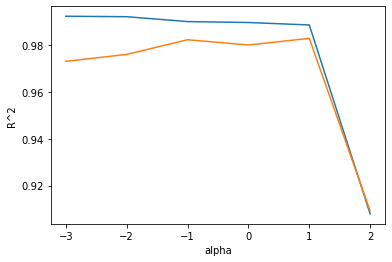

In [30]:
#동일한 간격으로 데이터를 나타내기 위해 로그함수로 바꾸어 지수로 표현
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

> 파란색 : 훈련 세트 , 주황색 : 테스트 세트

> 두 그래프가 가장 가깝고 테스트 세트의 점수가 가장 높은 1 일때 , 즉 $10^{1}=10$ 이 최적의 alpha값 ! 

In [31]:
# alpha = 10 로 다시 라쏘
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled , train_target)
print(lasso.score(train_scaled , train_target))
print(lasso.score(test_scaled , test_target))

0.9888067471131866
0.9824470598706695


### 라쏘는 계수가 0일 수도 있다. $\to$ coef_ 에 저장 

In [32]:
print(np.sum(lasso.coef_ == 0))

40


> 55개 특성을 주입했지만 사용한 특성은 15개라는 뜻